# 크롤링 (crawling)

## 크롤링으로 데이터 가져오기
### 1. 실행 전 확인사항
1. 파이썬 버전확인: 윈도우 시작버튼 > anaconda3 > anaconda prompt > cmd창 모드 python --version 3.8.8 출력
2. jpype 사이트 (https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype) 에서 Jpype1-1.1.2-cp38-cp38-win_amd64.whl 설치
3. c:\User\Cha-laptop 폴더에 저장
4. anaconda cmd 창에 pip install Jpype1-1.1.2-cp38-cp38-win_amd64.whl 입력
5. 형태소분석: konlpy 모듈 설치: pip install konlpy

###  2. 나무위키 사이트로 접속하여 한글 데이터 가져오기

In [2]:
from selenium import webdriver
import re
# chromedriver.exe 파일의 위치 설정
path= "C:/Users/CHA-LAPTOP/Downloads/chromedriver"
# 크롤링할 사이트 주소 설정
source_url= "https://namu.wiki/RecentChanges"
driver= webdriver.Chrome(path)
driver.get(source_url)

In [3]:
a_data=driver.find_elements_by_css_selector("table tr td a")
print(len(a_data))

477


#### a_data: a 태그들의 모임
#### a:<a href= ....>문자열</a>
#### a 태그: 문자열을 클릭하면 href속성의 값으로 현재 브라우저 페이지가 변경됨
#### href 속성의 값으로 연결하여 브러우저페이지에 표시됨

In [4]:
page_urls= []
cnt= 0
# a_data: a 태그들의 모임
# a: <a href= ....>문자열</a>
# a 태그: 문자열을 클릭하면 href속성의 값으로 현재 브라우저 페이지가 변경됨
# href 속성의 값으로 연결하여 브러우저페이지에 표시됨

for a in a_data:
    # a 태그의 속성 중 href속성이 없는경우
    if a.get_attribute('href')== None:
        continue # 반복문의 처음으로 제어 이동
    page_url= a.get_attribute('href')
    if 'png' not in page_url:
        page_urls.append(page_url)
        cnt += 1
    if cnt>10:
        break
# 중복 url을 제거
# set(page_urls): 중복된 url 정보가 한개만 남음
# page_urls: 크롤링 대한이 되는 url 정보 저장
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)
print("*****************")
print(page_urls)
# 크롤링에 사용한 브라우저를 종료
driver.close()

https://namu.wiki/history/%ED%8B%80:%EC%8A%A4%ED%86%A0%EB%A6%AC/%ED%86%A0%EB%A6%AC/%ED%8C%A9%ED%86%A0%EB%A6%AC
https://namu.wiki/discuss/%EC%99%95%ED%8F%89(%EC%82%BC%EA%B5%AD%EC%A0%84%ED%88%AC%EA%B8%B0)
https://namu.wiki/w/%EC%99%95%ED%8F%89(%EC%82%BC%EA%B5%AD%EC%A0%84%ED%88%AC%EA%B8%B0)
https://namu.wiki/history/%EC%99%95%ED%8F%89(%EC%82%BC%EA%B5%AD%EC%A0%84%ED%88%AC%EA%B8%B0)
https://namu.wiki/w/%ED%8B%80:%EC%8A%A4%ED%86%A0%EB%A6%AC/%ED%86%A0%EB%A6%AC/%ED%8C%A9%ED%86%A0%EB%A6%AC
*****************
['https://namu.wiki/history/%ED%8B%80:%EC%8A%A4%ED%86%A0%EB%A6%AC/%ED%86%A0%EB%A6%AC/%ED%8C%A9%ED%86%A0%EB%A6%AC', 'https://namu.wiki/discuss/%EC%99%95%ED%8F%89(%EC%82%BC%EA%B5%AD%EC%A0%84%ED%88%AC%EA%B8%B0)', 'https://namu.wiki/w/%EC%99%95%ED%8F%89(%EC%82%BC%EA%B5%AD%EC%A0%84%ED%88%AC%EA%B8%B0)', 'https://namu.wiki/history/%EC%99%95%ED%8F%89(%EC%82%BC%EA%B5%AD%EC%A0%84%ED%88%AC%EA%B8%B0)', 'https://namu.wiki/w/%ED%8B%80:%EC%8A%A4%ED%86%A0%EB%A6%AC/%ED%86%A0%EB%A6%AC/%ED%8C%A9%ED%86%A0%EB%A6

In [5]:
import pandas as pd
from bs4 import BeautifulSoup
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

In [6]:
# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로
for page_url in page_urls:
    # 사이트의 html 구조에 기반하여 크롤링을 수행
    driver = webdriver.Chrome(path)  # 크롬브라우저 로드
    driver.get(page_url)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    # contents_table: article 이름의 태그 선택하여 저장
    contents_table = soup.find(name="article")
    # contents_table 태그의 하위 태그들 중 h1태그의 첫번째
    title = contents_table.find_all("h1")[0]
    # contents_table 태그의 하위 태그들 중 ul태그의 갯수 0보다 큰 경우
    # 카테고리 정보가 없는 경우를 확인.
    if len(contents_table.find_all("ul")) > 0:
        # category: contents_table 태그 하위 태그 중 첫번쨰 ul 태그
        category = contents_table.find_all("ul")[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출. 없는 경우, 빈 문자열로 대체
    if title is not None:
        # row_title: 제목
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""

   # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출. 없는 경우, 빈 문자열로 대체.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
    # category: 첫번째 ul 태그    
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출. 없는 경우, 빈 문자열로 대체
    if category is not None:
        # row_category: ul 태그의 텍스트
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    
    # 모든 정보를 하나의 데이터 프레임에 저장
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료
    driver.close()

In [7]:
df.head(5)


,title,category,content_text
0,틀:스토리/토리/팩토리 (문서 역사),2021-07-13 14:46:10 (보기 | RAW | Blame | 이 리비전으...,
1,왕평(삼국전투기) (토론),,
2,왕평(삼국전투기),삼국전투기/등장인물,1. 개요2. 작중 행적2.1. 한중 공방전2.2. 남만 전투2.3. 가정 전투2....
3,왕평(삼국전투기) (문서 역사),2021-07-13 14:46:10 (보기 | RAW | Blame | 이 리비전으...,
4,틀:스토리/토리/팩토리,스토리(유튜버),스토리의 틀스토리의 틀 [ 펼치기 · 접기 ]스토리팩토리토리유튜브중립유튜브특수문자 ...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         11 non-null     object
 1   category      11 non-null     object
 2   content_text  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [9]:
# 한글아니면 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식.
    result = hangul.sub('', text)
    return result
# title 컬럼의 내용 중 한글만 남기고, 나머지 정보는 제거
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)



,title,category,content_text
0,틀스토리토리팩토리 문서 역사,보기 이 리비전으로 되돌리기 비교 ...,
1,왕평삼국전투기 토론,,
2,왕평삼국전투기,삼국전투기등장인물,개요 작중 행적 한중 공방전 남만 전투 가정 전투 오장원 전투 전투외편 낙곡 전...
3,왕평삼국전투기 문서 역사,보기 이 리비전으로 되돌리기 비교 ...,
4,틀스토리토리팩토리,스토리유튜버,스토리의 틀스토리의 틀 펼치기 접기 스토리팩토리토리유튜브중립유튜브특수문자 채널 ...


### 3. konlpy의 형태소 분석기 모듈을 이용하여 단어를 추출하기

In [15]:
from konlpy.tag import Okt
from collections import Counter
nouns_tagger = Okt() # 명사 추출을 위한 형태소 분석기

# 각 피처마다 말뭉치를 생성
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())

# 각 단어들의 빈도수 계산
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)
# print(count) 실행시, 단어 빈도수 출력됨

# 한글자 단어들은 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
# print(remove_char_counter)

# 불용어 제거, 불용어 파일 읽기

korean_stopwords_path = "C:/Users/CHA-LAPTOP/Downloads/pdata/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
# print(stopwords[:10])

# remove_char_counter 데이터에서 불용어를 제거
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
# print(remove_char_counter)


### 4. 워드 클라우드 시각화
1. 폰트 다운로드 http://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf
2. 폰트 저장 C:\Users\CHA-LAPTOP\anaconda3\Lib\site-packages\pytagcloud\fonts
3. fonts 폴더의 font.json 파일을 메모장으로 열기-> 아래문장 추가하고 저장하기
{
      "name": "NanumGothic",
      "ttf": "NanumGothic.ttf",
      "web": "http://fonts.googleapis.com/css?family=Nanum+Gothic"
},

pygame 2.0.1 (SDL 2.0.14, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


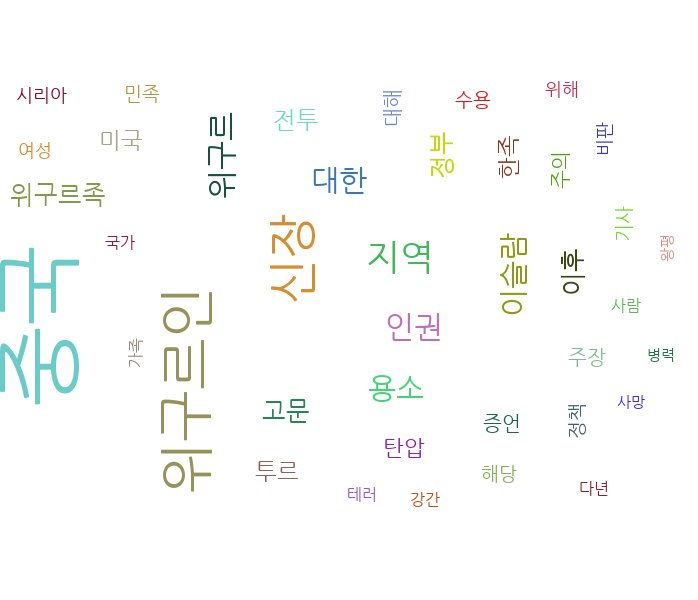

In [16]:
import pytagcloud # wordcloud 시각화를 위한 모듈

# remove_char_counter: 단어의 빈도수 저장. 단어길이가 두개이상인 단어, 불용어 제거
# most_common(40): 가장 많이 사용된 단어 40개만 저장
ranked_tags = remove_char_counter.most_common(40)
ranked_tags # 단어구름 시각화에 표시될 내용
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# wordcloud 시각화를 wordcloud.jpg 이미지 파일로 저장
# fontname='NanumGothic' : 한글 표시가 가능한 폰트여야함
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg',
            size=(900, 600), fontname='NanumGothic', rectangular=False)

# 생성된 이미지 바로 콘솔에 출력
from IPython.display import Image
Image(filename='wordcloud.jpg')

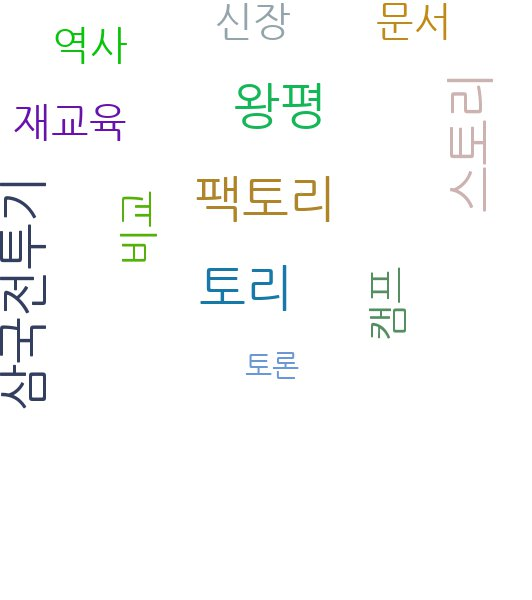

In [17]:
# title 부분을 단어구름으로 시각화 하기: titlecloud.jpg
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns) #단어들의 빈도수
# 한문자 단어 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
# stopwords: 불용어 저장 객체
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=50)
pytagcloud.create_tag_image(taglist, 'titlecloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)
Image(filename='titlecloud.jpg')

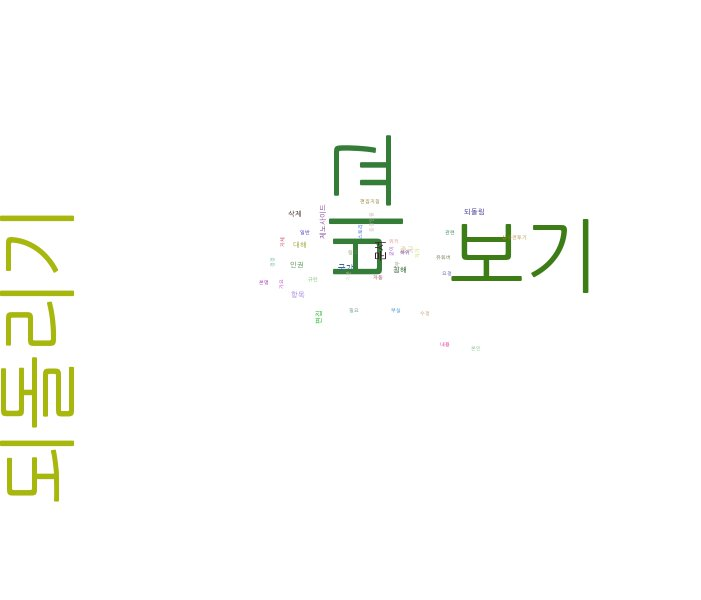

In [18]:
# category 부분을 단어구름으로 시각화하기: categorycloud.jpg
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in remove_char_counter if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'categorycloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='categorycloud.jpg')